# DATASET : [GASTOS MEDICOS PERSONAL](https://www.kaggle.com/datasets/mirichoi0218/insurance)

# PASO 1 : IMPORTAMOS LIBRERIAS

In [1]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 4.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
sns.set(style='whitegrid',context='notebook')

# PASO 2 : CARGAMOS DATASET

In [4]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# PASO 3 : EXPLORACION DE DATOS

In [5]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [6]:
df.isna().sum().sum()

np.int64(0)

## DATOS ATIPICOS

<Axes: >

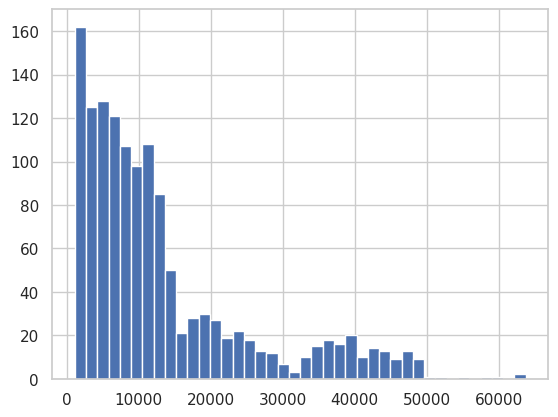

In [7]:
df.charges.hist(bins=40)

In [8]:
df[df.charges>50000].value_counts().sum()

np.int64(7)

In [9]:
df.shape

(1338, 7)

### ELIMINAMOS LOS DATOS ATIPICOS AL SER 7 SOLAMENTE

In [10]:
df = df[df.charges<=50000]
df.shape

(1331, 7)

# PASO 4 - CORRELACIONES

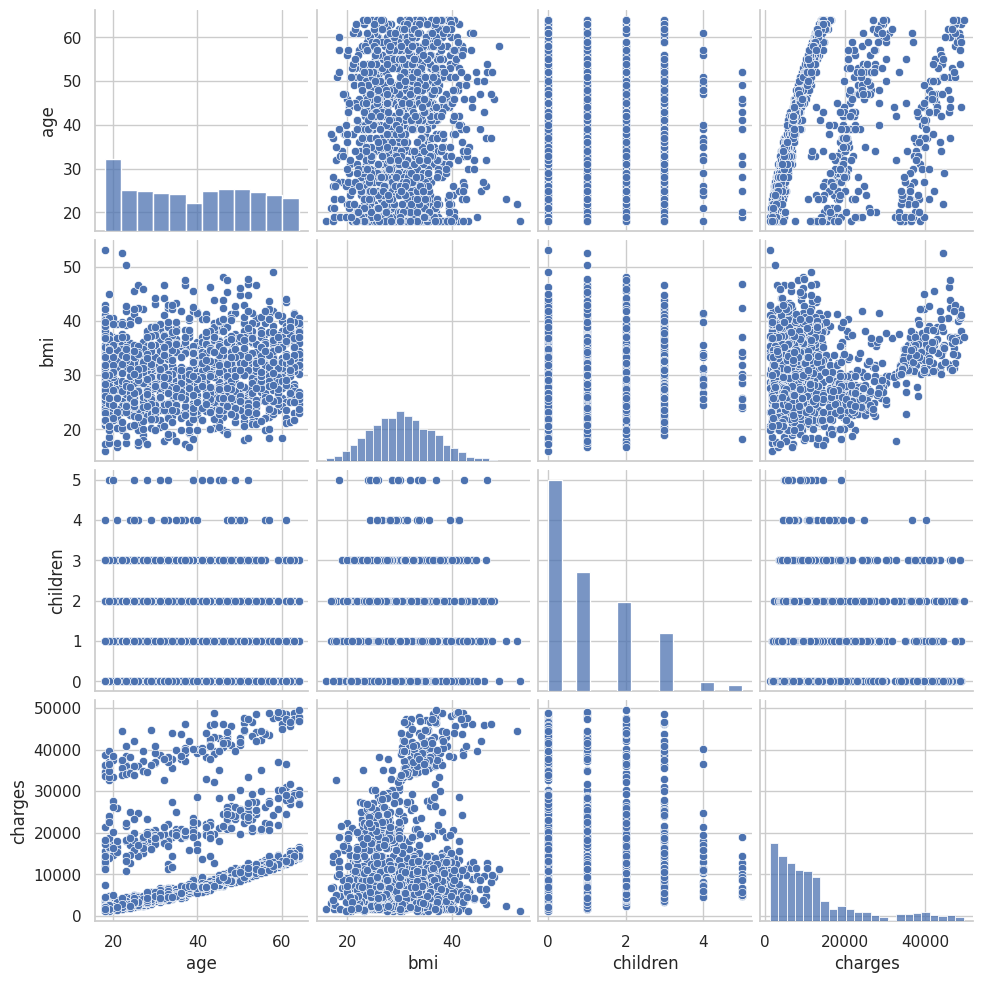

In [11]:
sns.pairplot(df,height=2.5)
plt.show()

<Axes: >

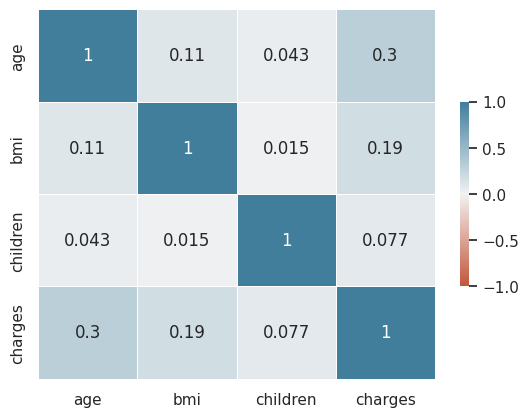

In [12]:
sns.heatmap(
    data=df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

<Axes: xlabel='age', ylabel='charges'>

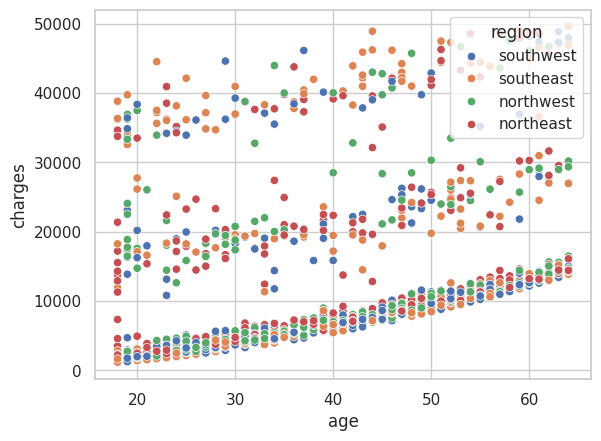

In [13]:
sns.scatterplot(data=df,x=df.age,y=df.charges,hue=df.region)

# PASO 5 - CREANDO MODELO DE MACHINE LEARNING CON REGRESION LINEAL MULTIPLE

In [14]:
from sklearn.model_selection import train_test_split

data = df.copy()
data = data.select_dtypes(include=['number'])
data.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


In [15]:
X = data[['age']]
y = data[['charges']]
print(X)
print(y)

      age
0      19
1      18
2      28
3      33
4      32
...   ...
1333   50
1334   18
1335   18
1336   21
1337   61

[1331 rows x 1 columns]
          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1331 rows x 1 columns]


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [17]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred.shape

(333, 1)

## METRICAS DEL MODELO

In [18]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print("r2",r2)
print("mse",mse)


r2 0.08807270159882707
mse 0.9119272984011729


# PROBAMOS EL MODELO

In [19]:
edad = 30
edad_sc = sc_x.transform(np.array([edad]).reshape(-1,1))
print(f"LOS GASTOS MEDICOS PARA UNA PERSONA CON {edad} años son {sc_y.inverse_transform(model.predict(edad_sc))}")

LOS GASTOS MEDICOS PARA UNA PERSONA CON 30 años son [[10665.15777017]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# GUARDAMOS LOS MODELOS Y SCALERS

In [20]:
import joblib

joblib.dump(model, 'insurance.pkl')
joblib.dump(sc_x,'scaler_x.pkl')
joblib.dump(sc_y,'scaler_y.pkl')


['scaler_y.pkl']